In [2]:
import pandas as pd
from example_files.predict import load_ressources
from matplotlib import pyplot as plt
from numpy import cov
import glob
import os
from example_files.data_cleaning_feature_engineering import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
pd.set_option('display.max_columns', None)

Load the model in order to conduct an analysis on the importance of the different features.

In [3]:
model = load_ressources()

In [4]:
#import and preprocess the datasets that are needed for evaluation and creating recommendations 

In [5]:
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv')
y_pred_boost_test = pd.read_csv('data/y_pred_boost_test.csv')
y_pred_test_proba = pd.read_csv('data/y_pred_test_proba.csv')


In [6]:
path = r'data/data-2' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)
df = preprocessing(df)

In [7]:
df[["launched_at", "deadline"]] = df[["launched_at", "deadline"]].apply(pd.to_datetime, unit='s')

In [8]:
df.head()

,deadline,goal,launched_at,state,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,current_currency_CAD,current_currency_USD,staff_pick_False,staff_pick_True,usd_type_domestic,usd_type_international,category_slug_art,category_slug_comics,category_slug_crafts,category_slug_dance,category_slug_design,category_slug_fashion,category_slug_film & video,category_slug_food,category_slug_games,category_slug_journalism,category_slug_music,category_slug_photography,category_slug_publishing,category_slug_technology,category_slug_theater
0,2017-09-09 17:00:59,1000.0,2017-08-10 17:00:59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2013-06-12 05:03:15,15000.0,2013-05-13 05:03:15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2017-03-13 17:22:56,10000.0,2017-01-12 18:22:56,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2013-01-09 20:32:07,2800.0,2012-12-10 20:32:07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2015-05-02 02:25:46,3500.0,2015-04-02 02:25:46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [9]:
df['project_period'] = df['deadline'] - df['launched_at']

<AxesSubplot:>

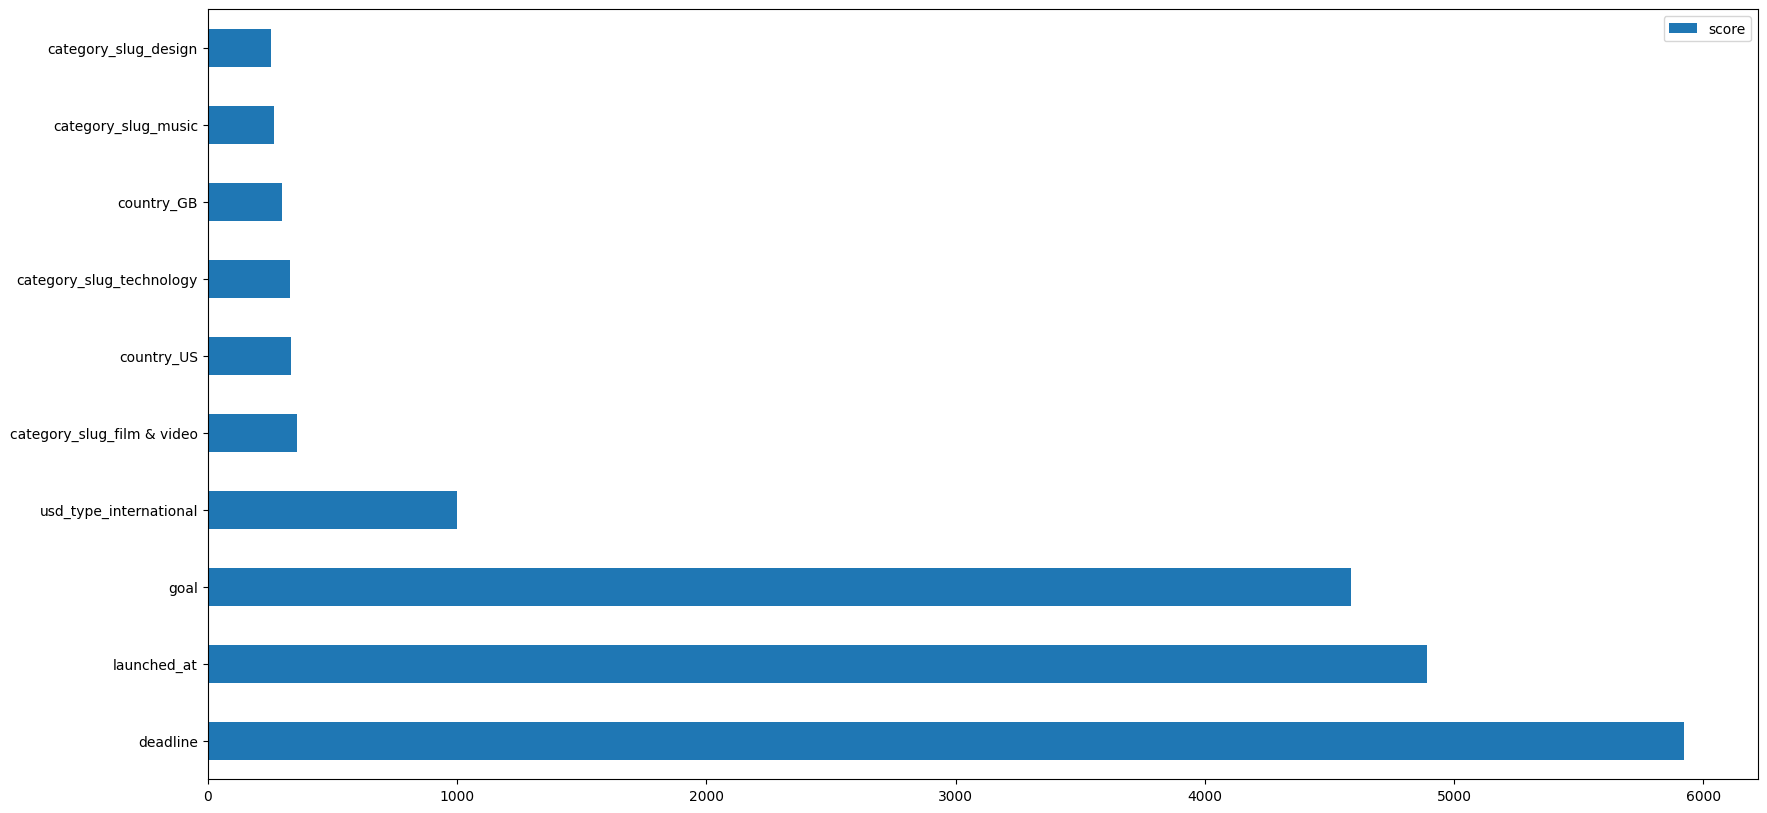

In [10]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

The most important features for our model are "deadline", "launched_at" and "goal". "Deadline" and "launched_at" can be combined to a new feature "project_period".

In order to give recommendations to our customers, we want to discover the best values for the above mentioned features.

In [11]:
df_successful = df[df['state'] == 1]

In [12]:
df_successful.goal.mean()

13774.325237304729

In [13]:
df_successful.project_period.mean()

Timedelta('30 days 22:15:56.200272421')

/Users/tommyguuun45/neuefische/Kickstarter-success-ml-project/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goal', ylabel='Density'>

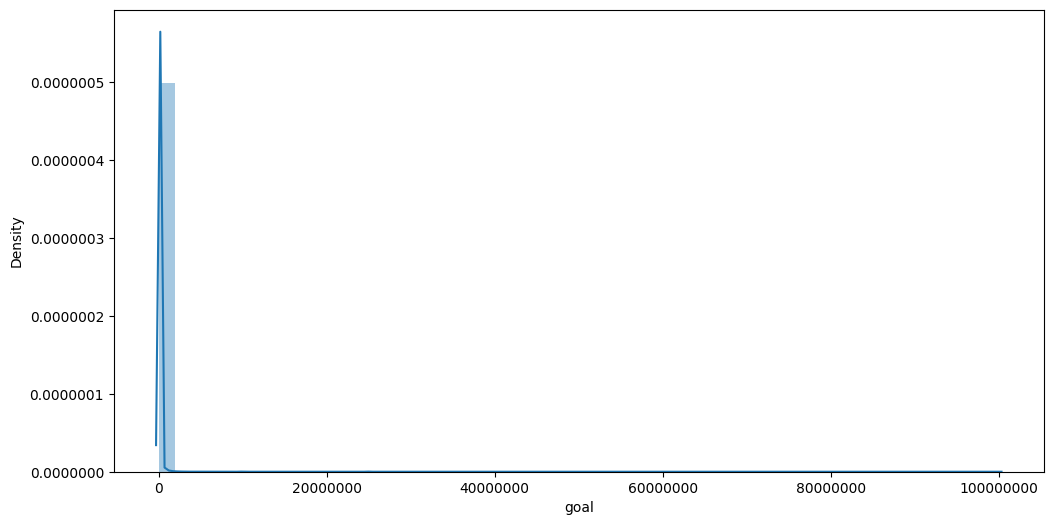

In [14]:
plt.figure(figsize=(12,6))
plt.subplot().ticklabel_format(useOffset=False,style='plain')
sns.distplot(df['goal'])


In [15]:
df_successful['launched_at_month'] = df_successful['launched_at'].dt.month_name()
df_successful = df_successful.sort_values('launched_at_month')

/var/folders/v5/2t1nx7fj59d55trx9mjjm3xw0000gn/T/ipykernel_12877/2129700802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_successful['launched_at_month'] = df_successful['launched_at'].dt.month_name()


<AxesSubplot:xlabel='launched_at'>

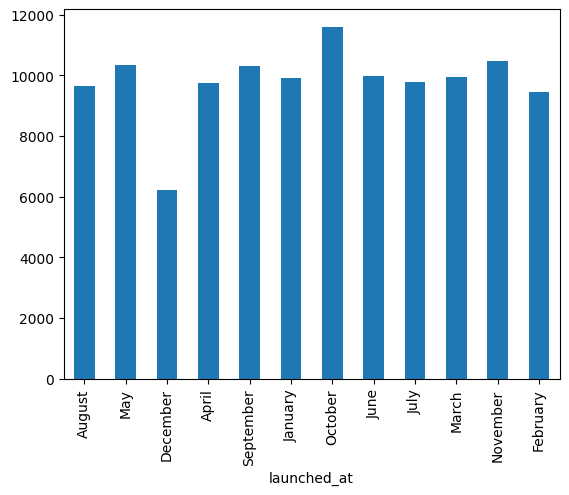

In [16]:
df.groupby([df_successful['launched_at'].dt.month_name()], sort=False).count().eval('state')\
  .plot(kind='bar')

In [17]:
print(classification_report(y_test, y_pred_boost_test))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71     24816
           1       0.81      0.83      0.82     38764

    accuracy                           0.78     63580
   macro avg       0.77      0.76      0.76     63580
weighted avg       0.78      0.78      0.78     63580



In [18]:
print(confusion_matrix(y_test, y_pred_boost_test))

[[17271  7545]
 [ 6614 32150]]


In [19]:
df_classification = X_test.join(y_test)
df_classification = df_classification.join(y_pred_boost_test)

In [20]:
df_classification = df_classification.rename(columns={"0": "prediction"})

In [21]:
df_classification['correct?'] = df_classification['prediction'] == df_classification['state']

In [22]:
df_classification

,deadline,goal,launched_at,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,current_currency_USD,staff_pick_True,usd_type_international,category_slug_comics,category_slug_crafts,category_slug_dance,category_slug_design,category_slug_fashion,category_slug_film & video,category_slug_food,category_slug_games,category_slug_journalism,category_slug_music,category_slug_photography,category_slug_publishing,category_slug_technology,category_slug_theater,state,prediction,correct?
0,1368644747,10000.0,1366052747,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False
1,1306195200,1000.0,1305371190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,True
2,1379515740,5000.0,1378306140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,True
3,1436932740,8000.0,1434391094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,True
4,1496946799,2710.0,1494354799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63575,1426222740,5000.0,1421963548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,True
63576,1446063290,20000.0,1443471290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,True
63577,1415032606,4500.0,1413214606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,True
63578,1466772989,207000.0,1464180989,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


In [23]:
df_misclassified = df_classification[df_classification['correct?'] == False]
df_correct = df_classification[df_classification['correct?'] == True]

In [24]:
df_misclassified.describe()

,deadline,goal,launched_at,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,current_currency_USD,staff_pick_True,usd_type_international,category_slug_comics,category_slug_crafts,category_slug_dance,category_slug_design,category_slug_fashion,category_slug_film & video,category_slug_food,category_slug_games,category_slug_journalism,category_slug_music,category_slug_photography,category_slug_publishing,category_slug_technology,category_slug_theater,state,prediction
count,1.415900e+04,1.415900e+04,1.415900e+04,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.0,14159.000000,14159.000000,14159.000000,14159.00000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000,14159.000000
mean,1.458858e+09,1.409893e+04,1.456040e+09,0.023307,0.002401,0.045130,0.003884,0.014478,0.005791,0.009746,0.011088,0.102761,0.002966,0.003178,0.009605,0.001413,0.000706,0.011018,0.009111,0.003178,0.004238,0.008546,0.004026,0.720884,0.045130,0.003884,0.005791,0.062858,0.102761,0.002966,0.001413,0.011018,0.003178,0.004238,0.008546,0.004026,0.720884,1.0,0.051487,0.481672,0.024649,0.02479,0.011088,0.024013,0.051345,0.152765,0.075288,0.061092,0.022954,0.144431,0.052617,0.086659,0.114203,0.030652,0.467123,0.532877
std,5.585847e+07,1.412332e+05,5.589261e+07,0.150881,0.048946,0.207597,0.062206,0.119456,0.075883,0.098245,0.104720,0.303658,0.054385,0.056288,0.097538,0.037558,0.026567,0.104389,0.095018,0.056288,0.064961,0.092051,0.063323,0.448580,0.207597,0.062206,0.075883,0.242715,0.303658,0.054385,0.037558,0.104389,0.056288,0.064961,0.092051,0.063323,0.448580,0.0,0.220996,0.499682,0.155057,0.15549,0.104720,0.153095,0.220709,0.359774,0.263864,0.239507,0.149761,0.351539,0.223275,0.281344,0.318069,0.172379,0.498936,0.498936
min,1.243770e+09,1.000000e+00,1.241036e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.423094e+09,1.500000e+03,1.420405e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.459538e+09,5.000000e+03,1.456842e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,

In [25]:
df_classification.describe()

,deadline,goal,launched_at,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,current_currency_USD,staff_pick_True,usd_type_international,category_slug_comics,category_slug_crafts,category_slug_dance,category_slug_design,category_slug_fashion,category_slug_film & video,category_slug_food,category_slug_games,category_slug_journalism,category_slug_music,category_slug_photography,category_slug_publishing,category_slug_technology,category_slug_theater,state,prediction
count,6.358000e+04,6.358000e+04,6.358000e+04,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000,63580.000000
mean,1.460008e+09,4.147924e+04,1.457209e+09,0.022712,0.002406,0.045470,0.003319,0.015414,0.004435,0.009059,0.012221,0.110522,0.005002,0.003256,0.010774,0.001762,0.000346,0.010381,0.008666,0.002296,0.004042,0.006842,0.003209,0.715477,0.045470,0.003319,0.004435,0.064533,0.110522,0.005002,0.001762,0.010381,0.002296,0.004042,0.006842,0.003209,0.715477,0.999858,0.134335,0.495690,0.042120,0.033485,0.019472,0.040988,0.057031,0.133910,0.077540,0.065288,0.027634,0.133422,0.038298,0.096084,0.100236,0.034115,0.609689,0.624332
std,6.221039e+07,9.689722e+05,6.227478e+07,0.148983,0.048997,0.208335,0.057513,0.123192,0.066451,0.094750,0.109871,0.313542,0.070545,0.056967,0.103237,0.041934,0.018599,0.101356,0.092689,0.047865,0.063450,0.082432,0.056554,0.451191,0.208335,0.057513,0.066451,0.245702,0.313542,0.070545,0.041934,0.101356,0.047865,0.063450,0.082432,0.056554,0.451191,0.011897,0.341014,0.499985,0.200865,0.179902,0.138176,0.198263,0.231903,0.340558,0.267449,0.247035,0.163924,0.340033,0.191917,0.294708,0.300317,0.181525,0.487824,0.484299
min,1.243770e+09,0.000000e+00,1.240674e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.418484e+09,1.500000e+03,1.415745e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.462388e+09,5.000000e+03,1.459711e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,

In [26]:
len(df_classification[df_classification['goal']<10000])/len(df_classification)

0.6538062283737024

75% of our misclassified observations have a goal < 10.000 USD. In our whole the dataset the percentage of projects with a goal < 15.000 is only around 65%. This means that our model tends to misqualify projects with smaller goals.

[Text(0.5, 0, 'Classification Result'), Text(0, 0.5, 'Funding goal')]

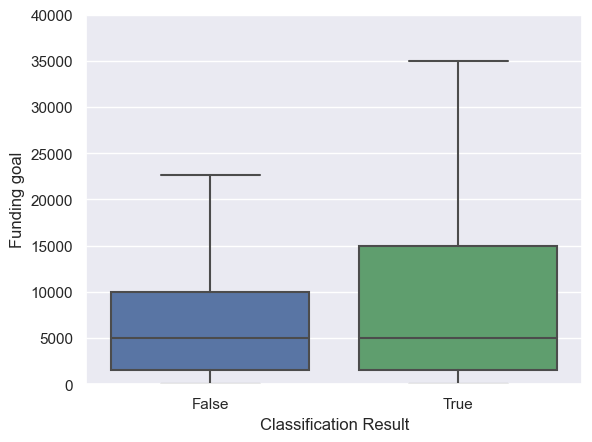

In [55]:
plt.ylim([0, 40000])
sns.set(style="darkgrid")
my_pal = {True: "g", False: "b"}
ax = sns.boxplot(y=df_classification['goal'], x=df_classification['correct?'], showfliers=False, palette=my_pal)
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .7))
ax.set(xlabel='Classification Result',ylabel='Funding goal')

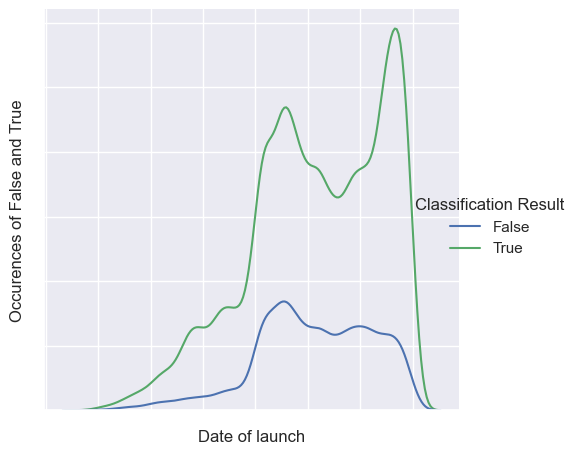

In [67]:
sns.set(style="darkgrid")
new_title='Classification Result'
my_pal = {True: "g", False: "b"}
ax = sns.displot(data=df_classification, x='launched_at', hue='correct?', kind='kde', palette=my_pal)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax._legend.set_title(new_title)
ax.set(xlabel='Date of launch',ylabel='Occurences of False and True')


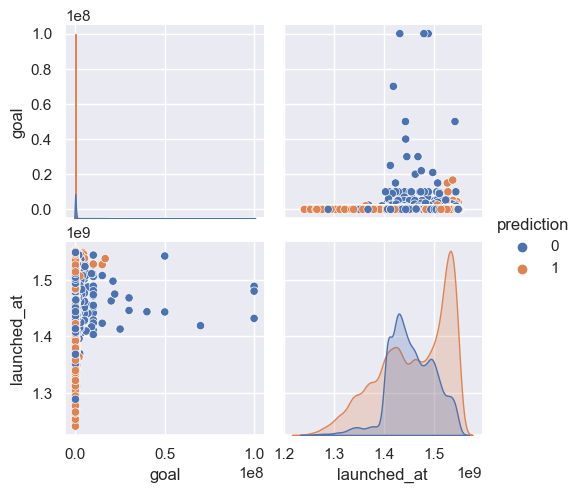

In [75]:
columns = ['goal', 'launched_at', 'prediction']
sns.pairplot(df_classification[columns], hue='prediction')

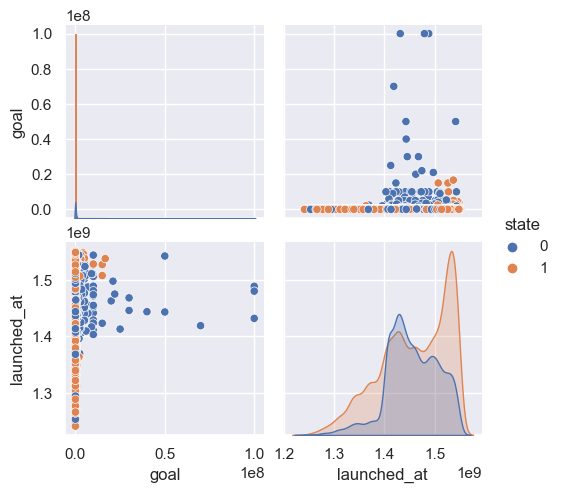

In [73]:
columns = ['goal', 'launched_at', 'state']
sns.pairplot(df_classification[columns], hue='state')